In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('../src/data/user_aggregates.csv')


Step 1: Data Description and Data Types

In [5]:
df.head()

,MSISDN/Number,Number of xDR Sessions,Total Session Duration (ms),Total Download (Bytes),Total Upload (Bytes),Total Data Volume (Bytes),YouTube Download (Bytes),YouTube Upload (Bytes),Netflix Download (Bytes),Netflix Upload (Bytes),Gaming Download (Bytes),Gaming Upload (Bytes),Other Download (Bytes),Other Upload (Bytes)
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0


In [7]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                106856 non-null  float64
 1   Number of xDR Sessions       106856 non-null  int64  
 2   Total Session Duration (ms)  106856 non-null  float64
 3   Total Download (Bytes)       106856 non-null  float64
 4   Total Upload (Bytes)         106856 non-null  float64
 5   Total Data Volume (Bytes)    106856 non-null  float64
 6   YouTube Download (Bytes)     106856 non-null  float64
 7   YouTube Upload (Bytes)       106856 non-null  float64
 8   Netflix Download (Bytes)     106856 non-null  float64
 9   Netflix Upload (Bytes)       106856 non-null  float64
 10  Gaming Download (Bytes)      106856 non-null  float64
 11  Gaming Upload (Bytes)        106856 non-null  float64
 12  Other Download (Bytes)       106856 non-null  float64
 13 

In [8]:
print(df.describe())

       MSISDN/Number  Number of xDR Sessions  Total Session Duration (ms)  \
count   1.068560e+05           106856.000000                 1.068560e+05   
mean    4.511474e+10                1.389777                 1.461672e+05   
std     2.889423e+12                0.809863                 1.863587e+05   
min     3.360100e+10                0.000000                 7.142000e+03   
25%     3.365088e+10                1.000000                 7.130800e+04   
50%     3.366365e+10                1.000000                 1.027400e+05   
75%     3.368344e+10                2.000000                 1.727990e+05   
max     8.823971e+14               18.000000                 1.855375e+07   

       Total Download (Bytes)  Total Upload (Bytes)  \
count            1.068560e+05          1.068560e+05   
mean             6.336527e+08          5.730942e+07   
std              4.645551e+08          3.565765e+07   
min              8.827082e+06          2.866892e+06   
25%              3.148271e+08  

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col} unique values:\n", df[col].unique())

Step 2: Handle Missing Values and Outliers

In [12]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)


MSISDN/Number                  0
Number of xDR Sessions         0
Total Session Duration (ms)    0
Total Download (Bytes)         0
Total Upload (Bytes)           0
Total Data Volume (Bytes)      0
YouTube Download (Bytes)       0
YouTube Upload (Bytes)         0
Netflix Download (Bytes)       0
Netflix Upload (Bytes)         0
Gaming Download (Bytes)        0
Gaming Upload (Bytes)          0
Other Download (Bytes)         0
Other Upload (Bytes)           0
dtype: int64


Step 3: Creating and Describing Variables


In [13]:
# Create Total Data column (Total Download + Total Upload)
df['Total_Data'] = df['Total Download (Bytes)'] + df['Total Upload (Bytes)']

# Total Session Duration already exists as "Total Session Duration (ms)"
# Describe key variables
print(df[['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']].describe())


       Number of xDR Sessions  Total Session Duration (ms)    Total_Data
count           106856.000000                106856.000000  1.068560e+05
mean                 1.291390                116775.594461  6.210808e+08
std                  0.537724                 68222.704749  3.365916e+08
min                  0.000000                  7142.000000  3.324901e+07
25%                  1.000000                 71308.000000  3.582423e+08
50%                  1.000000                102740.000000  6.169743e+08
75%                  1.389777                155542.000000  8.146677e+08
max                  3.000000                324991.000000  1.649611e+09


Step 4: Segmenting Users into Decile Classes

In [14]:
# Create deciles based on Total Session Duration
df['Decile'] = pd.qcut(df['Total Session Duration (ms)'], 10, labels=range(1, 11))

# Compute total data volume for each decile
decile_data = df.groupby('Decile')['Total_Data'].sum().reset_index()
print(decile_data)


  Decile    Total_Data
0      1  5.432887e+12
1      2  6.046481e+12
2      3  6.445154e+12
3      4  6.031769e+12
4      5  5.089029e+12
5      6  6.311735e+12
6      7  9.623668e+12
7      8  4.849035e+12
8      9  8.000972e+12
9     10  8.535478e+12


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_3588\1304454119.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = df.groupby('Decile')['Total_Data'].sum().reset_index()


Step 5: Analyzing Basic Metrics

In [15]:
# Calculate basic metrics
metrics = df[['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']].agg(['mean', 'median', 'std', 'var'])
print(metrics)


        Number of xDR Sessions  Total Session Duration (ms)    Total_Data
mean                  1.291390                 1.167756e+05  6.210808e+08
median                1.000000                 1.027400e+05  6.169743e+08
std                   0.537724                 6.822270e+04  3.365916e+08
var                   0.289147                 4.654337e+09  1.132939e+17


Step 6: Non-Graphical Univariate Analysis


In [16]:
# Compute range for each quantitative variable
quantitative_vars = ['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']
for col in quantitative_vars:
    col_range = df[col].max() - df[col].min()
    print(f"Range for {col}: {col_range}")


Range for Number of xDR Sessions: 3.0
Range for Total Session Duration (ms): 317849.0
Range for Total_Data: 1616362480.0


Step 7: Graphical Univariate Analysis


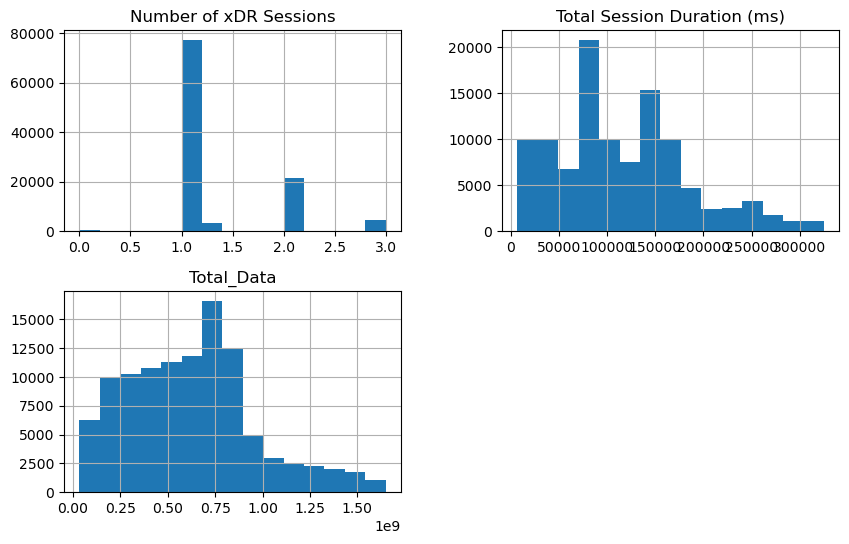

In [17]:
import matplotlib.pyplot as plt

# Plot histograms for key variables
df[['Number of xDR Sessions', 'Total Session Duration (ms)', 'Total_Data']].hist(bins=15, figsize=(10, 6))
plt.show()


Step 8: Bivariate Analysis


In [18]:
# Example: Correlation between YouTube data and total data
df['YouTube_Total'] = df['YouTube Download (Bytes)'] + df['YouTube Upload (Bytes)']
correlation = df[['YouTube_Total', 'Total_Data']].corr()
print(correlation)


               YouTube_Total  Total_Data
YouTube_Total       1.000000    0.439152
Total_Data          0.439152    1.000000


Step 9: Correlation Analysis


                          YouTube_Total  Netflix Download (Bytes)  \
YouTube_Total                  1.000000                  0.390024   
Netflix Download (Bytes)       0.390024                  1.000000   
Netflix Upload (Bytes)         0.392783                  0.318322   
Gaming Download (Bytes)        0.386493                  0.311439   
Gaming Upload (Bytes)          0.391528                  0.318637   
Other Download (Bytes)         0.386264                  0.312857   
Other Upload (Bytes)           0.381398                  0.315401   

                          Netflix Upload (Bytes)  Gaming Download (Bytes)  \
YouTube_Total                           0.392783                 0.386493   
Netflix Download (Bytes)                0.318322                 0.311439   
Netflix Upload (Bytes)                  1.000000                 0.313281   
Gaming Download (Bytes)                 0.313281                 1.000000   
Gaming Upload (Bytes)                   0.316135              

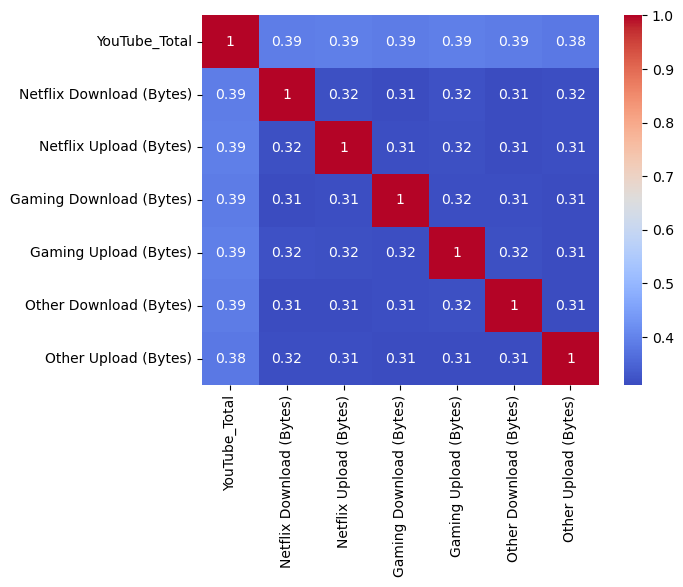

In [19]:
# Select application columns for correlation
app_data = df[['YouTube_Total', 'Netflix Download (Bytes)', 'Netflix Upload (Bytes)', 
               'Gaming Download (Bytes)', 'Gaming Upload (Bytes)', 
               'Other Download (Bytes)', 'Other Upload (Bytes)']]

# Compute correlation matrix
correlation_matrix = app_data.corr()
print(correlation_matrix)

# Plot heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Step 10: Dimensionality Reduction with PCA


Explained Variance Ratio: [0.4311193  0.09892491]


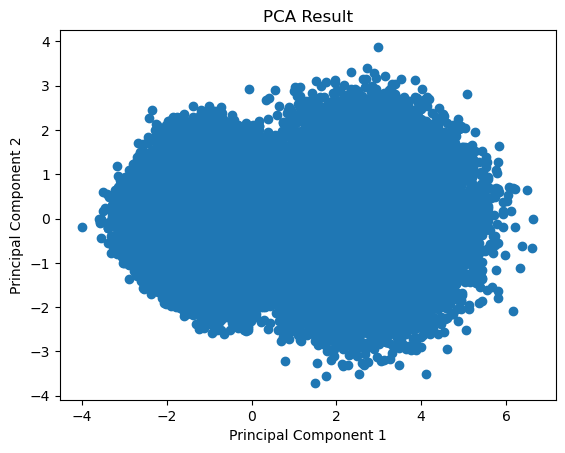

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(app_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Plot PCA result
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


# User Engagement Analysis

Step 1: Aggregate Metrics Per Customer ID


In [22]:
# Aggregate metrics per customer
user_engagement = df.groupby('MSISDN/Number').agg({
    'Number of xDR Sessions': 'sum',
    'Total Session Duration (ms)': 'sum',
    'Total_Data': 'sum'  # Total Download + Upload already computed
}).reset_index()

# Rename columns for clarity
user_engagement.columns = ['MSISDN', 'Total_Sessions', 'Total_Duration', 'Total_Traffic']

# Top 10 customers per metric
top_sessions = user_engagement.nlargest(10, 'Total_Sessions')
top_duration = user_engagement.nlargest(10, 'Total_Duration')
top_traffic = user_engagement.nlargest(10, 'Total_Traffic')

print("Top 10 customers by sessions frequency:")
print(top_sessions)

print("Top 10 customers by session duration:")
print(top_duration)

print("Top 10 customers by total traffic:")
print(top_traffic)


Top 10 customers by sessions frequency:
             MSISDN  Total_Sessions  Total_Duration  Total_Traffic
89906  4.511474e+10    21933.172831    2.017000e+09   1.050880e+13
26     3.360214e+10        3.000000    1.461672e+05   7.396424e+08
34     3.360216e+10        3.000000    2.534220e+05   9.608189e+08
41     3.360219e+10        3.000000    1.461672e+05   5.144220e+08
48     3.360222e+10        3.000000    2.791830e+05   1.261937e+09
50     3.360223e+10        3.000000    2.078750e+05   6.909621e+08
62     3.360227e+10        3.000000    5.098200e+04   1.430080e+09
66     3.360227e+10        3.000000    3.136210e+05   1.248116e+09
79     3.360231e+10        3.000000    1.624490e+05   6.909621e+08
85     3.360234e+10        3.000000    1.461672e+05   6.818340e+08
Top 10 customers by session duration:
             MSISDN  Total_Sessions  Total_Duration  Total_Traffic
89906  4.511474e+10    21933.172831    2.017000e+09   1.050880e+13
75513  3.367500e+10        2.000000    3.249910e+05

Step 2: Normalize Metrics and Apply K-Means (k=3)


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# Normalize the metrics
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(user_engagement[['Total_Sessions', 'Total_Duration', 'Total_Traffic']])

# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['Cluster'] = kmeans.fit_predict(normalized_data)

# Compute cluster statistics
cluster_stats = user_engagement.groupby('Cluster').agg({
    'Total_Sessions': ['min', 'max', 'mean', 'sum'],
    'Total_Duration': ['min', 'max', 'mean', 'sum'],
    'Total_Traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()

print("Cluster statistics:")
print(cluster_stats)


c:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Cluster statistics:
  Cluster Total_Sessions                                            \
                     min           max          mean           sum   
0       0       0.000000      3.000000      1.648924  64799.432751   
1       1   21933.172831  21933.172831  21933.172831  21933.172831   
2       2       0.000000      2.000000      1.012887  51260.169331   

  Total_Duration                                           Total_Traffic  \
             min           max          mean           sum           min   
0   2.151900e+04  3.249910e+05  1.588890e+05  6.244018e+09  8.032648e+07   
1   2.017000e+09  2.017000e+09  2.017000e+09  2.017000e+09  1.050880e+13   
2   7.146000e+03  3.141960e+05  8.332980e+04  4.217154e+09  3.324901e+07   

                                             
            max          mean           sum  
0  1.649611e+09  8.841377e+08  3.474485e+13  
1  1.050880e+13  1.050880e+13  1.050880e+13  
2  9.482341e+08  4.171784e+08  2.111256e+13  
